In [13]:
import os
import json
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from sklearn.preprocessing import normalize
import scipy.stats
%matplotlib nbagg

In [2]:
# with open("id_to_player.json", "w") as f:
#     json.dump(id_to_player, f)
# with open("player_to_id.json", "w") as f:
#     json.dump(player_to_id, f)

with open("id_to_player.json") as f:
    for l in f:
        id_to_player = json.loads(l)
id_to_player = {int(k): v for (k, v) in id_to_player.items()}
with open("player_to_id.json") as f:
    for l in f:
        player_to_id = json.loads(l)
player_to_id = {k: int(v) for (k, v) in player_to_id.items()}

In [3]:
#id_to_team = {}
# team_to_id = {}
# for root, dirs, files in os.walk(".\data"):
#     if len(id_to_team) == 30:
#         break
#     for fil in files:
#         with open(os.path.join(root, fil)) as f:
#             for l in f:
#                 line = json.loads(l)
#                 home_id = line["events"][0]["home"]["teamid"]
#                 home_name = line["events"][0]["home"]["name"]
#                 away_id = line["events"][0]["visitor"]["teamid"]
#                 away_name = line["events"][0]["visitor"]["name"]
#                 id_to_team[home_id] = home_name
#                 id_to_team[away_id] = away_name
#                 team_to_id[home_name] = home_id
#                 team_to_id[away_name] = away_id
#                 break

# with open("id_to_team.json", "w") as f:
#     json.dump(id_to_team, f)
# with open("team_to_id.json", "w") as f:
#     json.dump(team_to_id, f)

with open("id_to_team.json") as f:
    for l in f:
        id_to_team = json.loads(l)
id_to_team = {int(k): v for (k, v) in id_to_team.items()}        
with open("team_to_id.json") as f:
    for l in f:
        team_to_id = json.loads(l)
team_to_id = {k: int(v) for (k, v) in team_to_id.items()}

In [4]:
court = plt.imread("fullcourt.png")

<IPython.core.display.Javascript object>


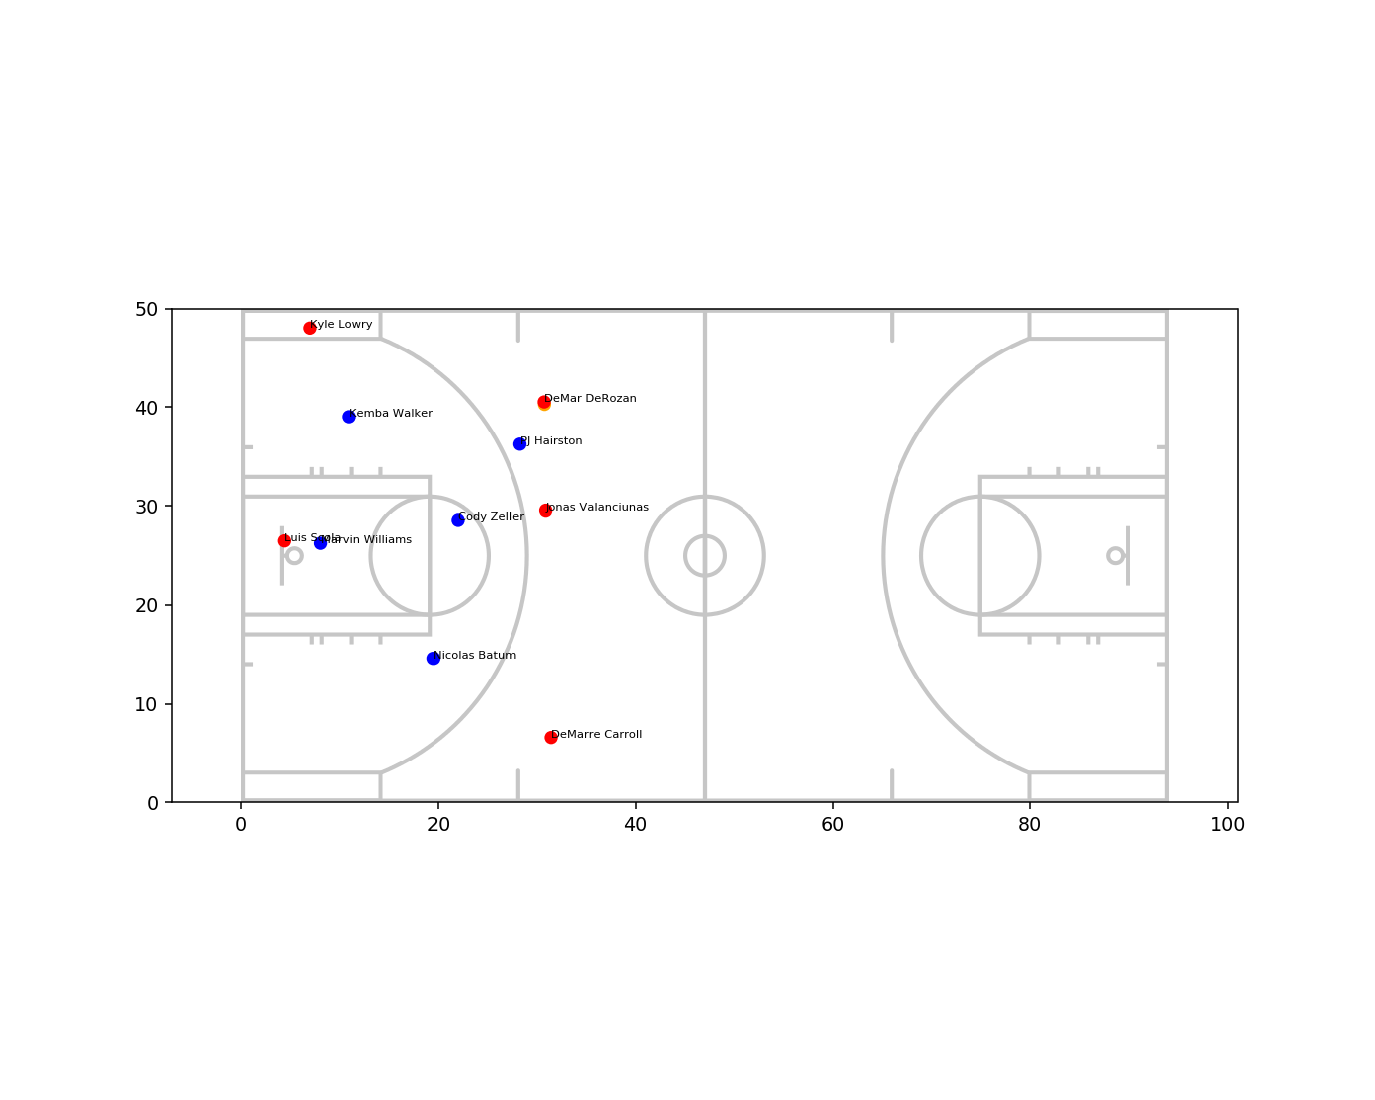

In [5]:
counter = 0
xs = []
ys = []
n = []
for root, dirs, files in os.walk(".\data"):
    counter += 1
    if counter > 2:
        break
    for fil in files:
        with open(os.path.join(root, fil)) as f:
            for l in f:
                line = json.loads(l)
                gid = line["gameid"]
                for mom in line["events"][4]["moments"]:
                    n = [id_to_player[val[1]] for val in mom[5]]
                    xs.append([val[2] for val in mom[5]])
                    ys.append([val[3] for val in mom[5]])
                break
                
fig = plt.figure(figsize=(10, 8))
ax1 = fig.add_subplot(1,1,1)
colors = ["orange"] + ["red"]*5 + ["blue"]*5

def animate(i):
    xar = xs[i]
    yar = ys[i]
    ax1.clear()
    ax1.set_xlim([-7, 101])
    ax1.set_ylim([0, 50])
    plt.imshow(court, zorder=0, extent=[0,94,50,0])
    ax1.scatter(xar,yar, color=colors)
    for j, txt in enumerate(n):
        ax1.annotate(txt, (xs[i][j],ys[i][j]), size=6)
ani = animation.FuncAnimation(fig, animate, interval=100)
plt.show()

In [5]:
def distance(x1, y1, x2, y2):
    return ((x1-x2)**2 + (y1-y2)**2)**0.5

### Find the distance travelled by all of the players

In [6]:
dist_dict = {}
seen_moments = set()

counter = 0
for root, dirs, files in os.walk(".\data"):
    #counter += 1
    if counter > 2:
        break
    for fil in files:
        if fil != "0021500504.json":
            break        
        counter += 1
        with open(os.path.join(root, fil)) as f:
            for l in f:
                line = json.loads(l)
                for i in range(len(line["events"])):
                    for mom in line["events"][i]["moments"]:
                        mom_tuple = (mom[2], mom[3], mom[5][0][2], mom[5][0][3])
                        for val in mom[5]:
                            player = val[1]
                            if player != -1:
                                team = val[0]
                                if team not in dist_dict:
                                    dist_dict[team] = {}
                                if player not in dist_dict[team]:
                                    dist_dict[team][player] = [0, val[2], val[3]]
                                else:
                                    if mom_tuple not in seen_moments:
                                        dist = distance(val[2], val[3], dist_dict[team][player][1], dist_dict[team][player][2])
                                        dist_dict[team][player][0] += dist
                                    dist_dict[team][player][1] = val[2]
                                    dist_dict[team][player][2] = val[3]
                        seen_moments.add(mom_tuple)
for team_id, players in dist_dict.items():
    print("\n{}".format(id_to_team[team_id]))
    for player_id, dists in sorted(players.items(), key=lambda x:x[1][0], reverse=True):
        print("{}: {} feet".format(id_to_player[player_id], dists[0]))


Golden State Warriors
Klay Thompson: 20927.0251674 feet
Andre Iguodala: 18530.0194107 feet
Draymond Green: 18260.77992 feet
Ian Clark: 16804.3338984 feet
Shaun Livingston: 11341.6224496 feet
Andrew Bogut: 9495.84029702 feet
Marreese Speights: 7526.14198528 feet
Jason Thompson: 5944.32560408 feet
Stephen Curry: 5786.16227523 feet

Denver Nuggets
Will Barton: 22379.0622289 feet
Jameer Nelson: 19469.6295803 feet
Gary Harris: 18644.3461389 feet
Danilo Gallinari: 17545.9759467 feet
Kenneth Faried: 12979.2123942 feet
Randy Foye: 9102.77880508 feet
Darrell Arthur: 7599.3519533 feet
Mike Miller: 4827.16323051 feet
Nikola Jokic: 2584.49093443 feet
Jusuf Nurkic: 2458.63231717 feet


In [7]:
def get_zone(x, y):
    if x < 0 or x > 94:
        return 0
    elif 19 <= y <= 31 and (x < 19 or x > 75):
        return 1 
    elif (0 <= x <= 14 or 80 <= x <= 94) and 0 <= y <= 3:
        return 2
    elif (0 <= x <= 14 or 80 <= x <= 94) and 47 <= y <= 50:
        return 3
    elif (0 <= x <= 14 or 80 <= x <= 94) and 3 < y < 19:
        return 4
    elif (0 <= x <= 14 or 80 <= x <= 94) and 31 < y < 47:
        return 5
    elif ((x < 47 and (x-5.25)**2 + (y-25)**2 < 23.75**2) or (x >= 47 and (x-88.75)**2 + (y-25)**2 < 23.75**2)) and y <= 25:
        return 6
    elif ((x < 47 and (x-5.25)**2 + (y-25)**2 < 23.75**2) or (x >= 47 and (x-88.75)**2 + (y-25)**2 < 23.75**2)) and y > 25:
        return 7
    elif y <= 25:
        return 8
    else:
        return 9

<IPython.core.display.Javascript object>


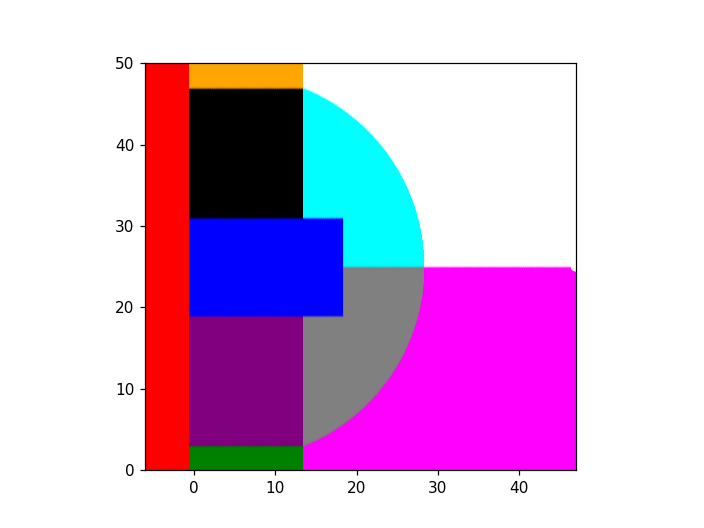

In [9]:
cmap = {0:"red", 1:"blue", 2:"green", 3:"orange", 4:"purple", 5:"black", 6:"grey", 7:"cyan", 8:"magenta", 9:"white"}
testx = []
testy = []
color = []
for i in np.arange(-6, 47, 0.05):
    for j in np.arange(0, 50, 0.05):
        testx.append(i)
        testy.append(j)
        color.append(cmap[get_zone(i, j)])
plt.scatter(testx, testy, c=color)
plt.xlim(-6, 47)
plt.ylim(0, 50)
plt.imshow(court, zorder=0, extent=[0,47,50,0])
plt.show()

### Find how players are travelling, transition matrix from one zone to another

In [8]:
transition_dict = {}
seen_moments = set()

counter = 0
for root, dirs, files in os.walk(".\data"):
    counter += 1
    if counter > 2:
        break
    for fil in files:
        with open(os.path.join(root, fil)) as f:
            for l in f:
                line = json.loads(l)
                for i in range(len(line["events"])):
                    for mom in line["events"][i]["moments"]:
                        mom_tuple = (mom[2], mom[3], mom[5][0][2], mom[5][0][3])
                        if mom_tuple not in seen_moments:
                            for val in mom[5]:
                                player = val[1]
                                if player != -1:
                                    team = val[0]
                                    zone = get_zone(val[2], val[3])
                                    if team not in transition_dict:
                                        transition_dict[team] = {}
                                    if player not in transition_dict[team]:
                                        transition_dict[team][player] = [np.zeros(shape=(10, 10)), zone]
                                    else:
                                        if transition_dict[team][player][1] != zone:
                                            transition_dict[team][player][0][transition_dict[team][player][1], zone] += 1
                                    transition_dict[team][player][1] = zone
                            seen_moments.add(mom_tuple)

### Find distances of each player to the ball at each moment

In [21]:
p = scipy.stats.norm(1, 1)
moment_dists = []
seen_moments = set()

counter = 0
for root, dirs, files in os.walk(".\data"):
    counter += 1
    if counter > 2:
        break
    for fil in files:
        with open(os.path.join(root, fil)) as f:
            for l in f:
                line = json.loads(l)
                for i in range(len(line["events"])):
                    for mom in line["events"][i]["moments"]:
                        mom_tuple = (mom[2], mom[3], mom[5][0][2], mom[5][0][3])
                        if mom_tuple not in seen_moments:
                            ballx = mom[5][0][2]
                            bally = mom[5][0][3]
                            dists = []
                            for val in mom[5]:
                                team = val[0]
                                player = val[1]
                                if player != -1:
                                    dists.append((id_to_player[player], p.pdf(distance(val[2], val[3], ballx, bally))))
                            seen_moments.add(mom_tuple)
                            moment_dists.append(sorted(dists, key=lambda x:x[1], reverse=True))

### Figure out who has the ball at any given moment

In [10]:
ballhandlers = []
for i, mom in enumerate(moment_dists):
    if mom[0][1] > 3:
        ballhandler = None
        for j in range(i-1, i-5, -1):
            if j < 0:
                break
            if ballhandlers[j][0] is None:
                for ind in range(j, i):
                    ballhandlers[ind] = (None, ballhandlers[ind][1])
    else:
        if i == 0 or i > 0 and mom[0][0] == moment_dists[i-1][0][0]:
            ballhandler = mom[0][0]
            if i > 0 and ballhandlers[i-1][0] is None:
                for j in range(i-1, i-5, -1):
                    if j < 0:
                        break
                    if ballhandlers[j][0] == ballhandler:
                        for ind in range(j, i):
                            ballhandlers[ind] = (ballhandler, ballhandlers[ind][1])
                
        else:
            ballhandler = None
    ballhandlers.append((ballhandler, mom[0][1]))

In [24]:
bh = []
for i, mom in enumerate(moment_dists[:1000]):
    if mom[0][1] < 0.05:
        ballhandler = None
        for j in range(i-1, i-5, -1):
            if j < 0:
                break
            if bh[j][0] is None:
                for ind in range(j, i):
                    bh[ind] = (None, bh[ind][1])
    else:
        if i == 0 or i > 0 and mom[0][0] == moment_dists[i-1][0][0]:
            ballhandler = mom[0][0]
            if i > 0 and bh[i-1][0] is None:
                for j in range(i-1, i-5, -1):
                    if j < 0:
                        break
                    if bh[j][0] == ballhandler:
                        for ind in range(j, i):
                            bh[ind] = (ballhandler, bh[ind][1])
                
        else:
            ballhandler = None
    bh.append((ballhandler, mom[0][1]))
for b in bh:
    print b

(u'Kyle Lowry', 0.09742909397417153)
(u'Kyle Lowry', 0.078402714361644366)
(u'Kyle Lowry', 0.05506145979001454)
(u'Kyle Lowry', 0.038757238145384648)
(u'Kyle Lowry', 0.038885012077807611)
(u'Kyle Lowry', 0.061065852963363053)
(u'Kyle Lowry', 0.091503980245236552)
(u'Kyle Lowry', 0.14577165469091277)
(u'Kyle Lowry', 0.19062650597337633)
(u'Kyle Lowry', 0.25031829216736923)
(u'Kyle Lowry', 0.28190298365223471)
(u'Kyle Lowry', 0.32448428344492203)
(u'Kyle Lowry', 0.31422148220694046)
(u'Kyle Lowry', 0.32421146988576138)
(u'Kyle Lowry', 0.34129431704001201)
(u'Kyle Lowry', 0.33765277938866362)
(u'Kyle Lowry', 0.3424001604170146)
(u'Kyle Lowry', 0.32612060549513333)
(u'Kyle Lowry', 0.29727132307883403)
(u'Kyle Lowry', 0.31211463159251085)
(u'Kyle Lowry', 0.33541657513942891)
(u'Kyle Lowry', 0.35971919722115264)
(u'Kyle Lowry', 0.36246753524023001)
(u'Kyle Lowry', 0.35089775694885483)
(u'Kyle Lowry', 0.35656010630218182)
(u'Kyle Lowry', 0.3415439548290084)
(u'Kyle Lowry', 0.38062300174359504

In [18]:
p = scipy.stats.norm(1, 1)
for i, mom in enumerate(moment_dists[:100]):
    for dist in mom:
        print dist[0], p.pdf(dist[1])
    print "\n"

Kyle Lowry 0.0974290939742
Kemba Walker 0.000201493046424
PJ Hairston 2.90668139872e-22
Jonas Valanciunas 9.37317129884e-24
DeMar DeRozan 8.5144988366e-24
Cody Zeller 4.10069304945e-40
Marvin Williams 7.75095445519e-127
Nicolas Batum 1.58613410086e-185
Luis Scola 2.46027996027e-203
DeMarre Carroll 1.80332728408e-241


Kyle Lowry 0.0784027143616
Kemba Walker 0.000169340049792
Jonas Valanciunas 2.60356443511e-21
PJ Hairston 6.67499450321e-25
DeMar DeRozan 1.5016226281e-27
Cody Zeller 2.29082018381e-39
Marvin Williams 1.74360864193e-126
Nicolas Batum 2.75978554782e-184
Luis Scola 3.19602059422e-200
DeMarre Carroll 1.48522812732e-237


Kyle Lowry 0.05506145979
Kemba Walker 9.51052200871e-05
Jonas Valanciunas 2.59517910154e-19
PJ Hairston 1.8442684364e-28
DeMar DeRozan 3.62485611677e-32
Cody Zeller 1.14412630768e-38
Marvin Williams 3.71785514652e-127
Nicolas Batum 2.50570815569e-184
Luis Scola 4.53539146797e-198
DeMarre Carroll 2.29574901446e-235


Kyle Lowry 0.0387572381454
Kemba Walker 5.

In [11]:
b_transition_dict = {}
seen_moments = set()

moment_num = 0
counter = 0
for root, dirs, files in os.walk(".\data"):
    counter += 1
    if counter > 2:
        break
    for fil in files:
        with open(os.path.join(root, fil)) as f:
            for l in f:
                line = json.loads(l)
                for i in range(len(line["events"])):
                    for mom in line["events"][i]["moments"]:
                        mom_tuple = (mom[2], mom[3], mom[5][0][2], mom[5][0][3])
                        if mom_tuple not in seen_moments:
                            for val in mom[5]:
                                team = val[0]
                                player = val[1]
                                if team == 1610612761 and player != -1 and id_to_player[player] == ballhandlers[moment_num][0]:
                                    zone = get_zone(val[2], val[3])
                                    if team not in b_transition_dict:
                                        b_transition_dict[team] = {}
                                    if player not in b_transition_dict[team]:
                                        b_transition_dict[team][player] = [np.zeros(shape=(10, 10)), zone]
                                    else:
                                        if b_transition_dict[team][player][1] != zone:
                                            b_transition_dict[team][player][0][b_transition_dict[team][player][1], zone] += 1
                                    b_transition_dict[team][player][1] = zone
                            seen_moments.add(mom_tuple)
                            moment_num += 1

In [12]:
for team, players in b_transition_dict.items():
    print team
    for player, trans in players.items():
        print id_to_player[player]
        print normalize(trans[0], axis=1, norm="l1")

1610612761
Kyle Lowry
[[ 0.          0.5         0.          0.          0.          0.          0.
   0.5         0.          0.        ]
 [ 0.          0.          0.          0.          0.0625      0.125
   0.1875      0.375       0.125       0.125     ]
 [ 0.          0.          0.          0.          0.5         0.          0.
   0.          0.5         0.        ]
 [ 0.          0.          0.          0.          0.          0.5         0.
   0.25        0.          0.25      ]
 [ 0.          0.5         0.125       0.          0.          0.          0.125
   0.25        0.          0.        ]
 [ 0.05882353  0.23529412  0.          0.11764706  0.05882353  0.          0.
   0.52941176  0.          0.        ]
 [ 0.02222222  0.13333333  0.          0.          0.04444444  0.04444444
   0.          0.22222222  0.48888889  0.04444444]
 [ 0.          0.14285714  0.          0.          0.01587302  0.07936508
   0.15873016  0.          0.06349206  0.53968254]
 [ 0.          0.055